# Machine Learning - TD1

By **CHARRIER Timothée** and **RAVELET Thomas**

## 1. First steps

In [44]:
# Warning deprecation
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Importing the libraries

import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Importing the dataset
from keras.datasets import mnist

# Neural network

import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

### 1.1. What are the shape of the data? 

In [14]:
# Loading the dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Display the dataset shape

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


Thus, we have 70000 images of 28x28 pixels, which is 784 pixels in total. There are 60000 images for the training set and 10000 images for the test set. Here are 10 random images of the training set :

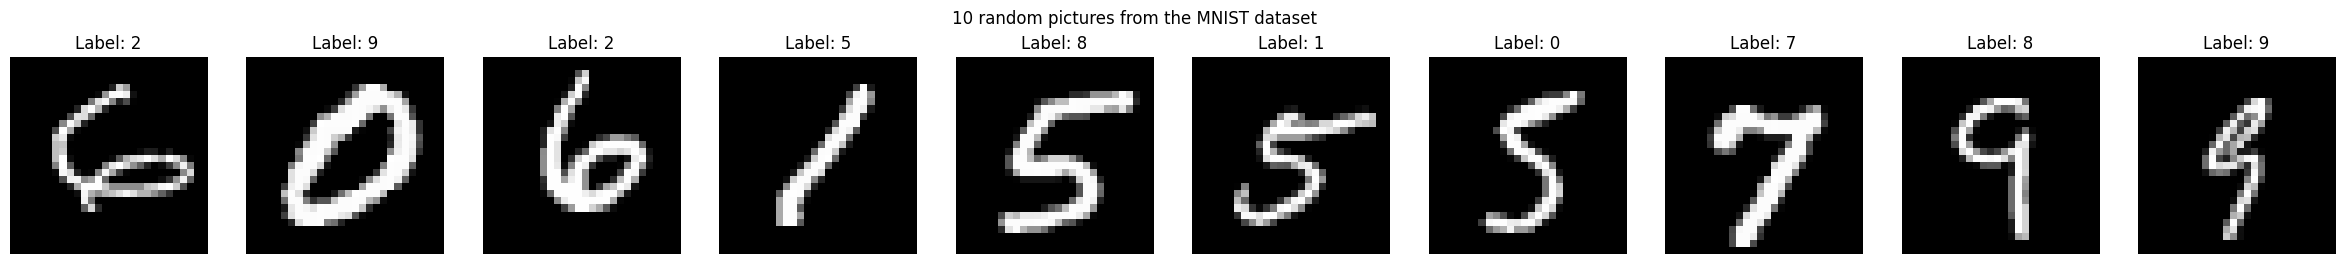

In [45]:
# Display 10 random pictures with their labels and axis off

fig, ax = plt.subplots(1, 10)
for i in range(10):
    random_index = random.randint(0, len(X_train))
    ax[i].imshow(X_train[random_index], cmap='gray')
    ax[i].set_title("Label: {}".format(Y_train[random_index]))
    ax[i].axis('off')
        
plt.suptitle("10 random pictures from the MNIST dataset")
fig.set_size_inches(30, 3.5)
plt.show()

### 1.2. Why split the data into training and test sets is important?

The method train_test_split allows to separate the data into two parts: a training part and a test part. This allows to test the model on data that it has not seen during training. This allows to check that the model is not over-trained. Indeed, if the model is over-trained, it will be able to predict the training data but not the test data. This means that the model is not generalizable.

### 1.3. Are the training and test sets balanced?

To check if the training and test sets are balanced, we can plot the number of images for each digit in percentage. We can see that the training and test sets are balanced.

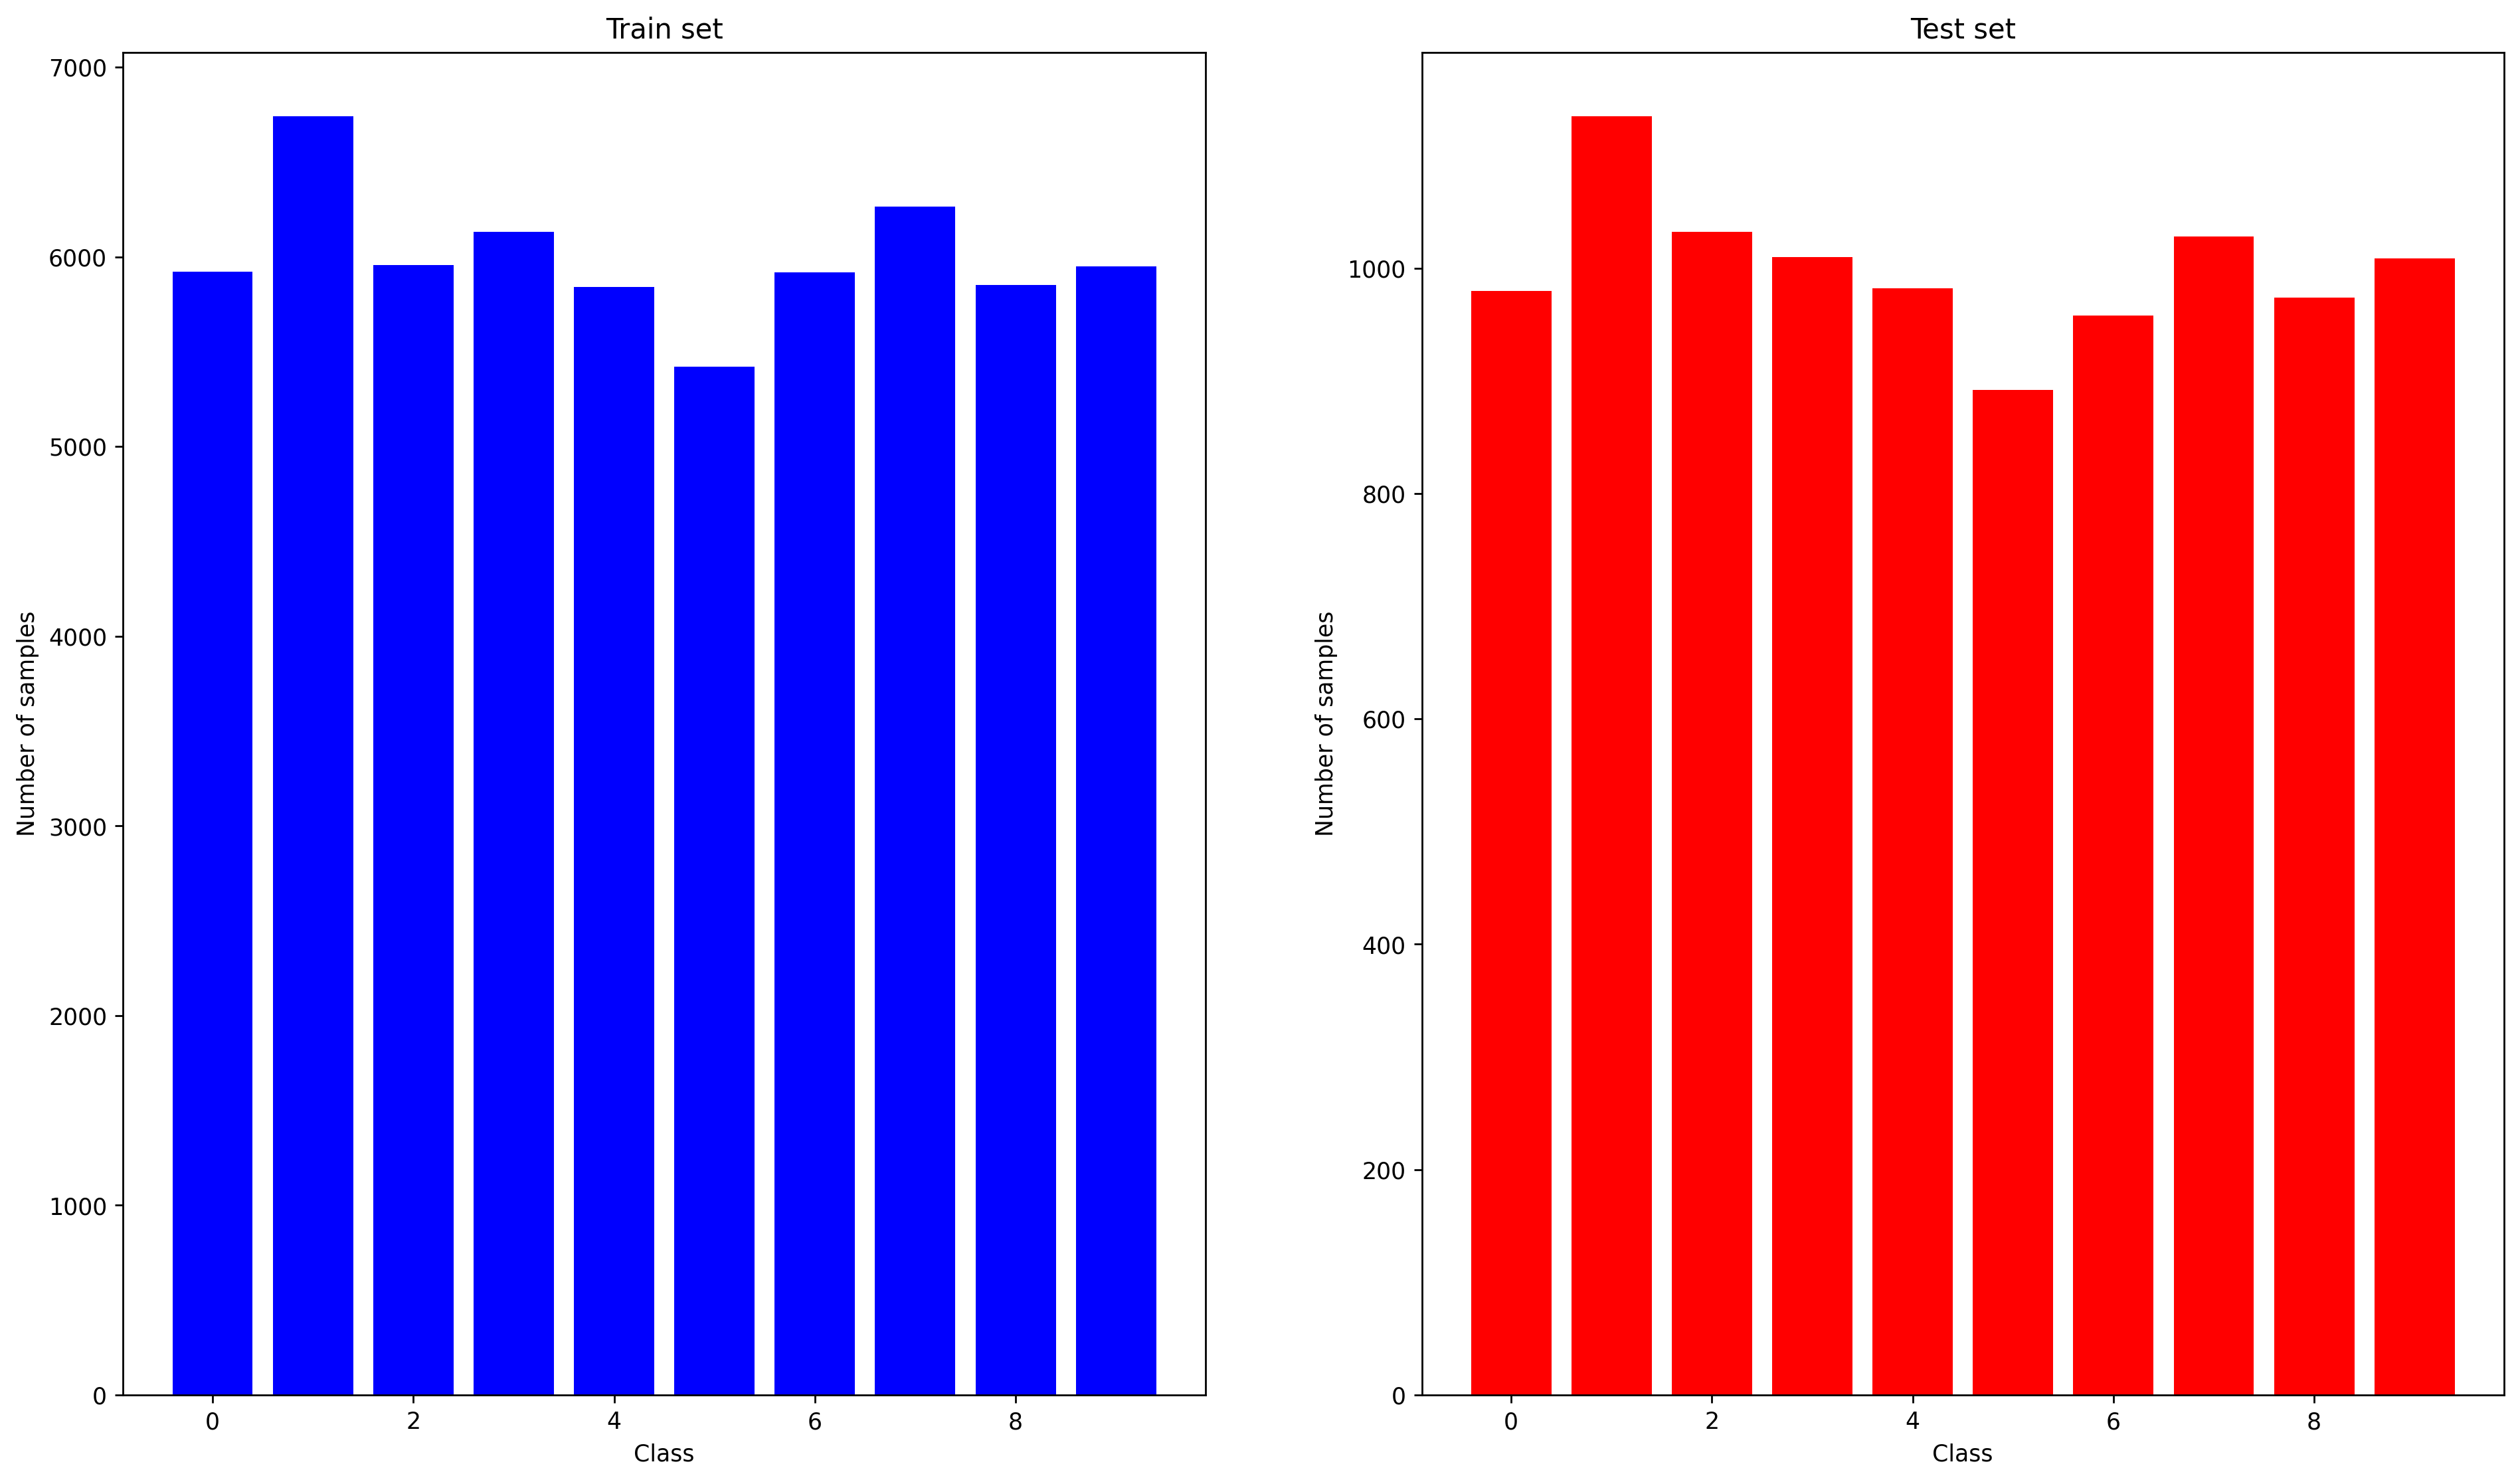

Train set standard deviation: 78.57
Test set standard deviation: 79.17


In [50]:
# Data balancing 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(np.arange(10), np.bincount(Y_train), color='blue')
ax[0].set_title("Train set")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of samples")
ax[1].bar(np.arange(10), np.bincount(Y_test), color='red')
ax[1].set_title("Test set")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Number of samples")
fig.set_size_inches(18.5, 10.5)
fig.dpi = 250
plt.show()

# Ecarts types

print("Train set standard deviation: {:.2f}".format(np.std(X_train)))
print("Test set standard deviation: {:.2f}".format(np.std(X_test)))

We can see that the training and test sets are balanced.

## 2. Second part: non-supervised learning

### 2.1. Perform a PCA on the training set

In this question, we will perform a PCA on the training set with the value of n_components in the following list: [10, 50, 100, 200, 500, 784]. We will then plot a random image of the training set and the corresponding image after the PCA.

In [10]:
# Reshape the dataset
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

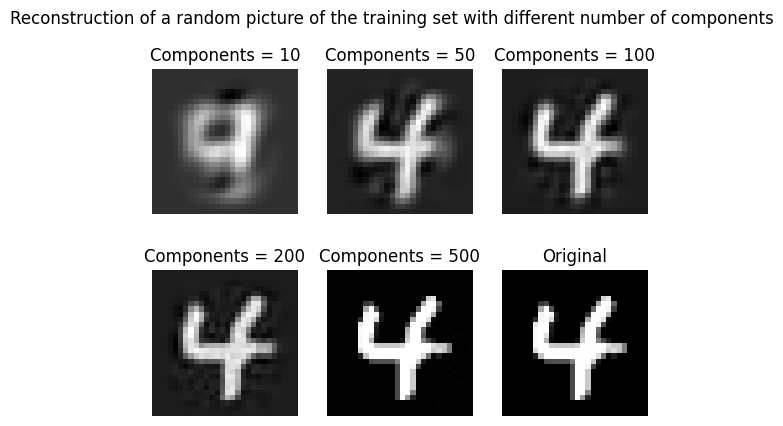

In [6]:
# PCA

n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 784]
random_index = np.random.randint(0, X_train.shape[0])
List_explained_variance = []
count = 0

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train_flat)

    # Explained variance

    List_explained_variance.append(np.sum(pca.explained_variance_ratio_))

    # Reconstruct the data and reshape it with the PCA model and display a picture if n = 10, 50, 100, 200, 500, 784
    if(n == 10 or n == 50 or n == 100 or n == 200 or n == 500 or n == 784):
        X_train_reconstructed = pca.inverse_transform(
            pca.transform(X_train_flat))

        X_train_reconstructed = X_train_reconstructed.reshape(
            X_train.shape[0], 28, 28)

        #  Display the reconstructed picture in the same figure

        plt.subplot(2, 3, count+1)
        plt.imshow(X_train_reconstructed[random_index], cmap='gray')
        plt.axis('off')
        count += 1

        if(n == 784):
            plt.title("Original")

        else:
            plt.title("Components = " + str(n))

plt.suptitle(
    "Reconstruction of a random picture of the training set with different number of components")
plt.show()


### 2.2. Explain these values according to your understanding of PCA and use these values to fit a relevant value for n_components.

We can see that the more components we keep, the more the image is similar to the original image. However, we can see that the image is not very clear when we keep only 10 components. We can also see that the image is very clear when we keep 784 components. Thus, we can say that the best value for n_components is 784. But the higher the value of n_components, the longer the computation time. Thus, we can choose a value of n_components between 200 and 500 to have a good image and a short computation time.

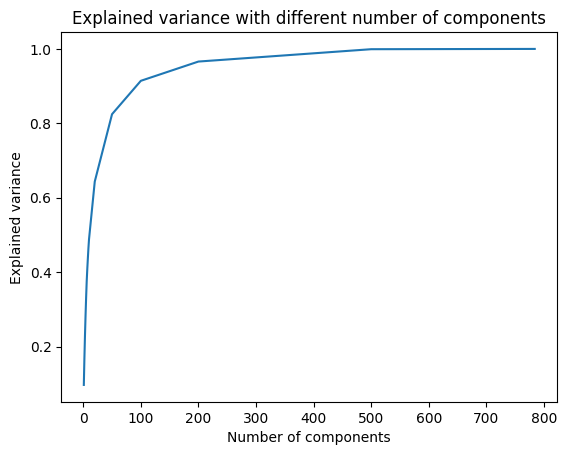

In [7]:
# Plot the explained variance

plt.plot(n_components, List_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance with different number of components")
plt.show(fi

When plotting the cumulative explained variance ratio, we can see that the first 200 components explain 90% of the variance. Thus, we can choose a value of n_components between 200 and 500 to have a good image and a short computation time.

### 2.3. With sklearn, perform K-MEANS. Play with the parameter K as well as the initialization (KMEANS++, random, or fixed array).

In [8]:
# Perform Kmeans clustering

from sklearn.cluster import KMeans

# Kmeans clustering with 10 clusters and using kmeans++ initialization vs random initialization

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_flat)

kmeans_random = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans_random = kmeans_random.fit_predict(X_train_flat)

<Figure size 1000x500 with 0 Axes>

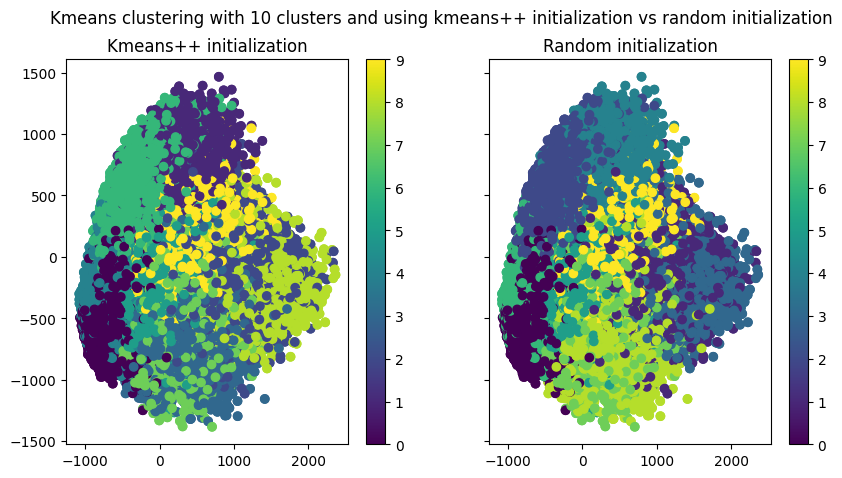

In [9]:
# PCA with 2 components

pca = PCA(n_components=2).fit(X_train_flat)

# Plot the clusters

f = plt.figure(figsize=(10, 5))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

ax1.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans)
ax1.set_title("Kmeans++ initialization")
ax2.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans_random)
ax2.set_title("Random initialization")
f.colorbar(ax1.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans))
f.colorbar(ax2.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans_random))

plt.suptitle("Kmeans clustering with 10 clusters and using kmeans++ initialization vs random initialization")
plt.show()

From the two pictures above, we cannot see any difference between the different initializations.

### 2.4. For the correct K (K=10), evaluate how good is this partition (with the knowledge of y).

Let's evaluate how good is the partition with the knowledge of y. We can easily see that the partition is not good. 

In [68]:
# Evaluate how good the partition is

from sklearn.metrics import adjusted_rand_score

print("Adjusted Rand score with kmeans++ initialization: {:.2f}%".format(adjusted_rand_score(Y_train, y_kmeans)*100))
print("Adjusted Rand score with random initialization: {:.2f}%".format(adjusted_rand_score(Y_train, y_kmeans_random)*100))

Adjusted Rand score with kmeans++ initialization: 36.07%
Adjusted Rand score with random initialization: 36.08%


The result confirms that the partition is not good.

### 2.5. Do the same job with the EM-clustering.

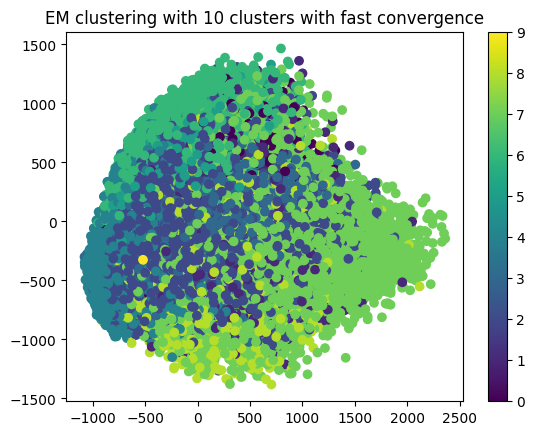

Adjusted Rand score: 18.76%


In [69]:
# Let's do the same but using EM clustering

from sklearn.mixture import GaussianMixture

# EM clustering with 10 clusters with fast convergence

gmm = GaussianMixture(n_components=10, covariance_type='full', max_iter=100, random_state=0)
y_gmm = gmm.fit_predict(X_train_flat)

# Plot the clusters

plt.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_gmm)
plt.colorbar()
plt.title("EM clustering with 10 clusters with fast convergence")
plt.show()

# Evaluate how good the partition is

print("Adjusted Rand score: {:.2f}%".format(adjusted_rand_score(Y_train, y_gmm)*100))

Using the EM-clustering, we can see that the partition is not good. Indeed, it is even worse than the K-MEANS partition. We got half of K-MEANS accuracy.
This is because the EM-clustering is not adapted to this problem. The EM-clustering is adapted to continuous data. In this case, the data is discrete. Thus, the EM-clustering is not adapted to this problem.

## 3. Third part: supervised learning

### 3.1. What is the major difference between Naïve Bayes Classifier and Support Vector 1 point Machine (or Logistic Regression)?

The major difference between Naïve Bayes Classifier and Support Vector Machine (or Logistic Regression) is that the Naïve Bayes Classifier is a generative model and the Support Vector Machine (or Logistic Regression) is a discriminative model. The generative model tries to model the joint distribution of the data. The discriminative model tries to model the conditional distribution of the data.

### 3.2. With sklearn, perform a classification using your favorite methods. With the documentation, check how to modify the parameters and comment how it influences the results.

In [10]:
#  Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train the model

gnb = GaussianNB()
gnb.fit(X_train_flat, Y_train)

# Test the model

y_pred = gnb.predict(X_test_flat)

# Evaluate the model

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred)*100))

Accuracy: 55.58%


In [12]:
# SVM classifier on reduced data with PCA

from sklearn.svm import SVC

# New training and test set with 100 components

pca_100 = PCA(n_components=100).fit(X_train_flat)
X_train_pca_100 = pca_100.transform(X_train_flat)

# Train the model

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_pca_100, Y_train)

# Test the model

X_test_pca_100 = pca_100.transform(X_test_flat)
y_pred = svm.predict(X_test_pca_100)

# Evaluate the model

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred)*100))

Accuracy: 11.35%


### 3.3. With the score method, compute the accuracy of the model on the training the test datasets. Why do we need to analyze the performance of the model at training and testing time?

In [15]:
# Accuracy of the model on the test set

print("Accuracy: {:.2f}%".format(grid.score(X_test_pca_100, Y_test)*100))

shape of X_train_flat: (60000, 784)


We need to analyze the performance of the model at training and testing time because we need to check that the model is not over-trained. Indeed, if the model is over-trained, it will be able to predict the training data but not the test data. This means that the model is not generalizable. Let's take another example with the Decision Tree Classifier.

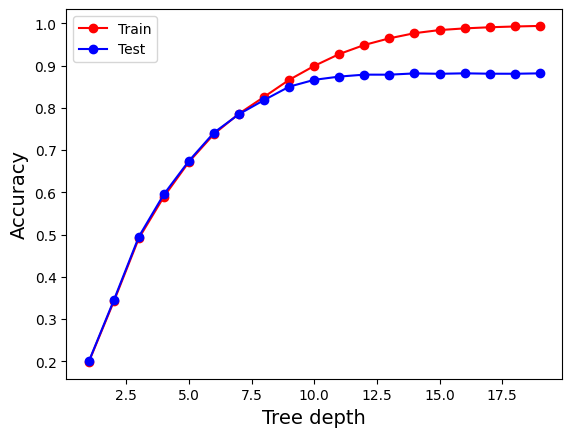

In [7]:
# Decision tree classifier

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 20)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train_flat, Y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_flat)
    train_acc = accuracy_score(Y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test_flat)
    test_acc = accuracy_score(Y_test, test_yhat)
    test_scores.append(test_acc)
   

# plot the depth vs accuracy
plt.plot(values, train_scores, '-o', label='Train', color='red')
plt.plot(values, test_scores, '-o', label='Test', color='blue')
plt.xlabel('Tree depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

We can see that with high values of max_depth, the model is over-trained: there is overfitting. The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets. However, after a certain point, the test set accuracy starts to decrease while the train set accuracy continues to increase. This is a sign of overfitting. Thus, we can say that the best value for max_depth is 10. Indeed, we have 10 digits in the dataset.

### 3.4. Does the PCA influence the performance of the classification (according to the intensity of the reduction)?

The PCA does not influence the performance of the classification. Indeed, we can see that the accuracy is the same with or without the PCA.

## 4. Fourth part: deep learning

Same as in 3.1.: we want to perform a supervised image classification task.
For a model based on neural networks, the development platform will be TENSORFLOW (with KERAS included).

**MultiLayer Perceptron**

Your first deep neural network is a Multy Layer Perceptron (MLP), i.e. a feedforward network only composed of fully connected layers. For your first attempt, use only one hidden layer.

### 4.1. What is the size of the input tensor? What is the size of the output layer?

The size of the input tensor is 784. The size of the output layer is 10.

In [35]:
# Size of the input tensor

input_tensor = keras.layers.Input(shape=(784,))

# Size of the output layer

output_layer = keras.layers.Dense(10, activation='softmax')(input_tensor)

# Size of the input tensor and output layer

print("Size of the input tensor: {}".format(input_tensor.shape))
print("Size of the output layer: {}".format(output_layer.shape))

Size of the input tensor: (None, 784)
Size of the output layer: (None, 10)


### 4.2. How many epochs do you use? What does it mean? What is the batch_size? What 1 points does it means?

An epoch is an iteration over the entire training data. We use 10 epochs. The batch_size is the number of samples per gradient update. We use a batch_size of 128.
In this case, the batch_size means that we will update the weights after 128 samples. To resume the parameters are:

    - batch size: the number of training examples used in one forward/backward pass of the neural network model.
    - number of epochs: the number of times the training algorithm iterates over the entire training set.

In [11]:
# Define epochs and batch size

epochs = 10
batch_size = 128

### 4.3. Why do we define a validation set (for example: validation_split=0.2)?

We define a validation set to check that the model is not over-trained. Indeed, if the model is over-trained, it will be able to predict the training data but not the test data. This means that the model is not generalizable.

### 4.3. Pick the most important parameters you have to set with the compile and the fit method. Briefly explain why they are important parameters, i.e. they influence the training process.

The most important parameters we have to set with the compile method are the optimizer and the loss. The optimizer is the algorithm used to minimize the loss. The loss is the function that is minimized by the optimizer. The most important parameters we have to set with the fit method are the epochs and the batch_size. The epochs is the number of iterations over the entire training data. The batch_size is the number of samples per gradient update.

In [12]:
# Load the data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data to 28x28 pixels

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Convert the data to the right type

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data to the range of [0, 1]

X_train /= 255
X_test /= 255

# Convert the labels to one-hot encoding

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

The code above setup the data for the MLP. We reshape the data to have a shape of (60000, 784). We also normalize the data to have values between 0 and 1. We can now build the neural network that use only one hidden layer.

In [7]:
# Let's build the neural network that only use one hidden layer

# Create the model

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, Y_test))

Let's plot the accuracy and the loss of the model. And also some predictions.

Test loss: 0.06199253723025322
Test accuracy: 0.9821000099182129
313/313 [==============================] - 0s 1ms/step


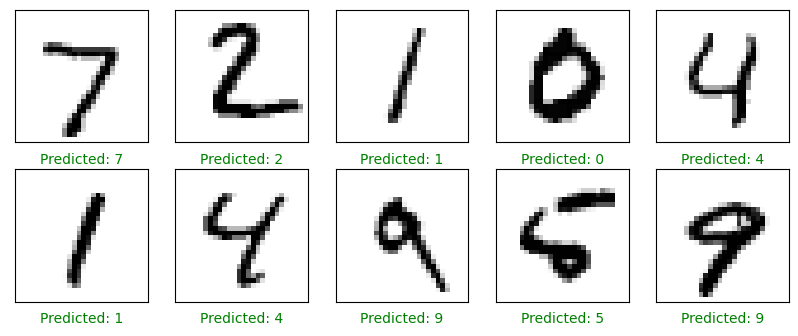

In [8]:
# Evaluate the model

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot images from the predictions

predictions = model.predict(X_test)

# Plot the first 10 images from the test set and their predicted labels and true labels

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    if np.argmax(predictions[i]) == np.argmax(Y_test[i]):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Predicted: {}".format(np.argmax(predictions[i])), color=color)
    
plt.show()

From the plot above, the prediction is not good. Only 3 out of 10 predictions are correct. We need to improve the model. Let's try to add a second hidden layer.

Test loss: 0.08810248225927353
Test accuracy: 0.984000027179718
313/313 [==============================] - 1s 2ms/step


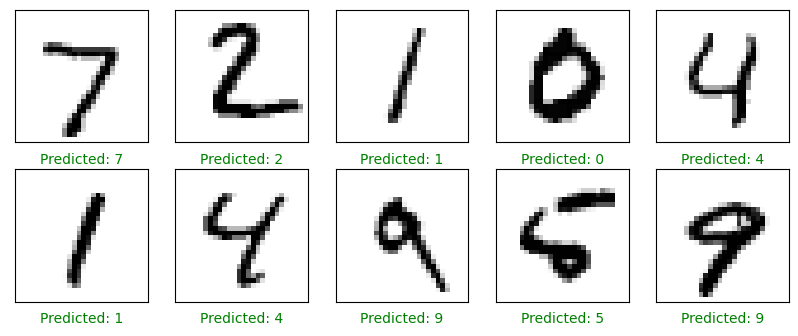

In [13]:
# Let's build the neural network that use two hidden layers

# Create the model

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


# Compile the model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=25, verbose=0, validation_data=(X_test, Y_test))


# Evaluate the model

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot images from the predictions

predictions = model.predict(X_test)

# Plot the first 10 images from the test set and their predicted labels and true labels

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    if np.argmax(predictions[i]) == np.argmax(Y_test[i]):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Predicted: {}".format(np.argmax(predictions[i])), color=color)

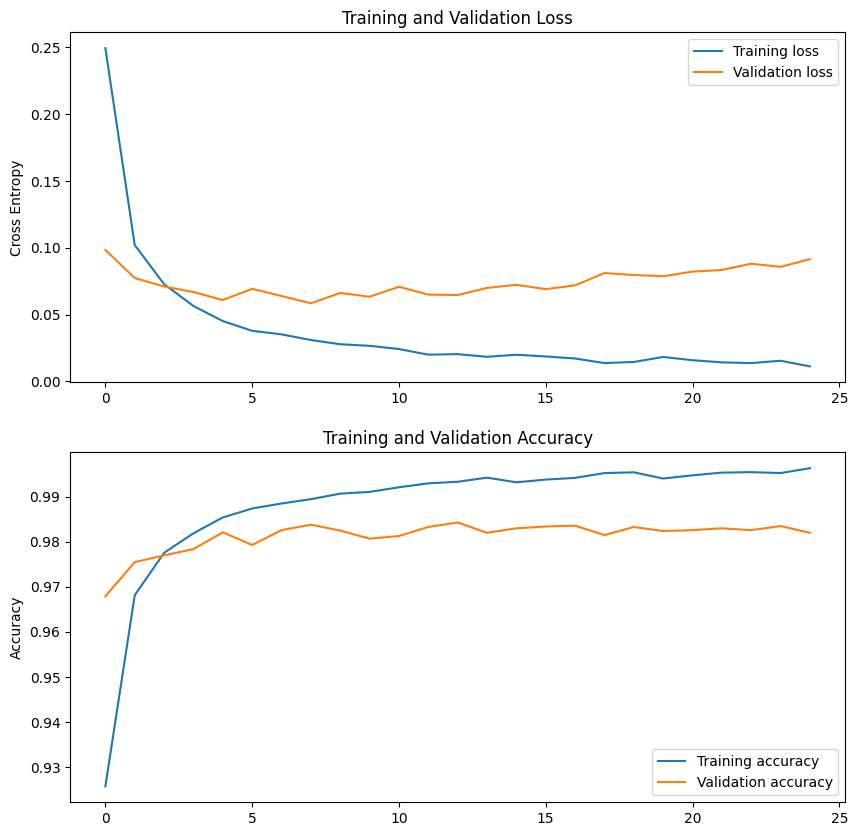

In [14]:
# Plot learning curves

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
# Plot learning curves

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()